# **Module 0:** Introduction to Jupyter Notebook and Colab

## Introduction to Colab Environment and Basic Data Generation

This guide aims to familiarize you with working in the Colab environment and acquaint you with fundamental data generation and plotting techniques. While these examples do not involve actual **machine learning**, they introduce essential models and mechanisms crucial for subsequent learning.

Each example requires you to code functions, respecting the defined function interface and provided instructions on their functionality. Following each example, there's a code cell that executes the functions, typically producing results in the form of plots. While your outputs need not precisely resemble the examples provided, they will likely follow a similar structure. (In our upcoming workshop, plotting functions might be provided, but in this introductory exercise, you're encouraged to create the plots yourself, allowing customization.)

![example of completed plots](https://raw.githubusercontent.com/WSU-AI-CyberSecurity/WSU-AI-CyberSecurity.github.io/main/assets/m0-example-plot.png)

If you're already adept at using NumPy and Matplotlib, especially within the context of ML, some exercises might appear straightforward. In such cases, the **Further Exploration** section offers additional challenges to explore.

Alternatively, if you lack experience in these areas, the exercises might seem intimidating. Don't be concerned if certain concepts feel unfamiliar at this stage. For now, focus on grasping the foundational concepts. If you encounter difficulties, feel free to seek assistance from our WSU staffs.

Before delving into the examples, the subsections below introduce Colab and the notebook format, demonstrating basic plotting. If you're already comfortable with these aspects, you can skip the **Using Colab** and **Basic Plotting** sections. However, ensure to execute all code cells in the **Setting Up** section, as they import necessary components essential for the remainder of the assignment.

The `utils` module contains some utility functions that can aid in avoiding tedious manipulations, such as array axis ordering. While not mandatory, it's beneficial to explore these functions as they can simplify certain exercises into concise one-liners through strategic utilization of `utils`.


## Using Colab

Google Colaboratory, commonly known as Colab, offers free access to computational resources through a web-based interface known as a **notebook**. While this approach has its advantages and disadvantages, it notably ensures a consistent software environment for all users, eliminating the need to grapple with installation and configuration issues across various, potentially incompatible laptops.

Notebooks are structured into distinct **cells**, comprising two primary types:
- **Text** cells (like this one) contain formatted text and can embed other media like images. It's essential to **read** and understand the content in these cells!
- **Code** cells (as seen below) contain Python program instructions and occasionally other system commands, often prefixed by an exclamation mark, such as `!ls -l`.

  Executing code within these cells occurs on a remote **virtual machine** by clicking the **play** ( ▶︎ ) button that appears in the cell's top left corner when hovered over. Some code might take a while to execute—during execution, the play button transforms into a **stop** (◾️) button, with an animated progress wheel indicating activity. Any output generated by the code displays at the cell's bottom. To halt execution, click the stop button.

  (For code cells to execute, the notebook must be **connected** to a virtual machine. This connection usually happens automatically the first time you attempt to run a cell, resulting in a brief delay.)

Feel free to try running the code in the cell below by clicking the play button.

In [ ]:
# a very simple example of a code cell
# running the cell will execute the statement below and generate output
print("hello world!")

hello world!


There are two important caveats to be aware of, one to do with the Jupyter notebook interface and the other to do with Colab:

1. The notebook interface allows **out of order execution** of code cells. That is, it is possible to run later cells before earlier ones. This is really **never what you want** and can give rise to all kinds of problems with inconsistent state. Always be sure to run cells in order. If you need to go back and re-run earlier cells (eg, because you want to change something) always follow that up by re-running all the subsequent cells in order too, to make sure everything is consistent.

2. The virtual machine environment that Colab runs behind this notebook interface is **resource-limited** and **transient**. If you don't do anything for awhile, the notebook may disconnect from the virtual machine. If you use too much computation then your session may be halted — and what qualifies as "too much" is kept intentionally vague. VMs are purged daily: if you stop and come back to it tomorrow the VM will have been deleted and you will need to go back to the beginning and go through the setup steps again. If you generate something that you want to keep, you should download it to your local machine.


## Setting Up

This notebook makes use of the NumPy library for numerical computing and the Matplotlib library for plotting. These are both extremely standard and are installed by default on your Colab instance. We just need to tell the Python interpreter we want to use them:

In [ ]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# this is probably the default, but just in case
%matplotlib inline

We're also going to bring in some shared WSU workshop code

In [ ]:
# we will clone workshop resources if they dont exists yet
![ -d wsu_workshop_utils ] || git clone https://github.com/wsu-ai-cyberSecurity/wsu_workshop_utils

import wsu_workshop_utils.utils as utils

In [ ]:
# finally, set up some items for use in later code
shared_rng = numpy.random.default_rng()

WEIGHTS = np.array([0.5, -0.4, 0.6])
LIMITS = (-5, 5)


def test_func(X):
    """
    Simple example function of 2 variables for
    testing grid & random optimisation.
    """
    return (
        (X[..., 0] - 1) ** 2 + X[..., 1] ** 2 + 2 * np.abs((X[..., 0] - 1) * X[..., 1])
    )

## Basic Plotting

The [Matplotlib](https://matplotlib.org) library provides extensive plotting capabilities,
originally modelled on those in Matlab. The library is big and
complicated, and though there is [extensive documentation online](https://matplotlib.org/stable/users/) it can be quite daunting at first.

Here we provide a few simple example plots that you can use as
starting points for some of the visualisations in the lab
assignments. They are not intended to be exhaustive, nor to be
perfect exemplars of best practice. If you are already familiar
with Matplotlib or just want to dig into it on your own, feel free
to ignore these examples.

It is pretty common practice, especially in a notebook environment and when doing exploratory data analysis, to use the "implicit" `pyplot` API for plotting. This does some behind the scenes object management for you, effectively maintaining global objects representing the current figure and graph axes. This API is slightly more succinct, allowing concise plotting commands like this:

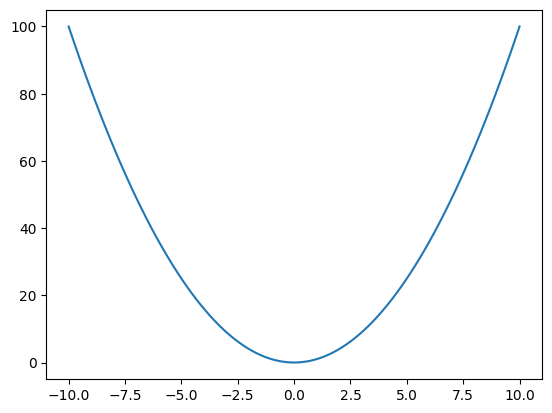

In [ ]:
# create some simple data to plot
xx = np.linspace(-10, 10, 100)
yy = xx * xx

# plot it using the implicit pyplot API
plt.plot(xx, yy);

However, the downside of this API is that it is less transparent and also less flexible. Here we will instead use the "explicit" (also referred to as the "object oriented") API, where we create and manage figures and axes ourselves. This is a little bit more verbose, but allows us more control and is a bit more upfront about what is being done.

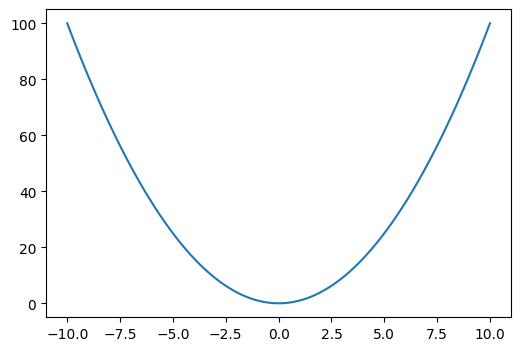

In [ ]:
# explicitly create a figure object and graph axes with in it
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# plot the same data as before using the explicit API
ax.plot(xx, yy);

In this very simple example there's not a whole lot of difference between the two approaches, but for more complex plots the explicit API is more versatile. For more on the differences between these APIs, see [this documentation page](https://matplotlib.org/stable/users/explain/api_interfaces.html).

### Line & Scatter Plots

The [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) method produces a generic 2D line and/or scatter plot, with graphical details such as colour and marker specified as additional parameters. We can call it multiple times to add additional content to a plot, and can also use further methods on the Axes object to add things like axis labels and a legend, as in the example below.

For more complex scatter plots, eg with variable marker size, there is also the [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) method.

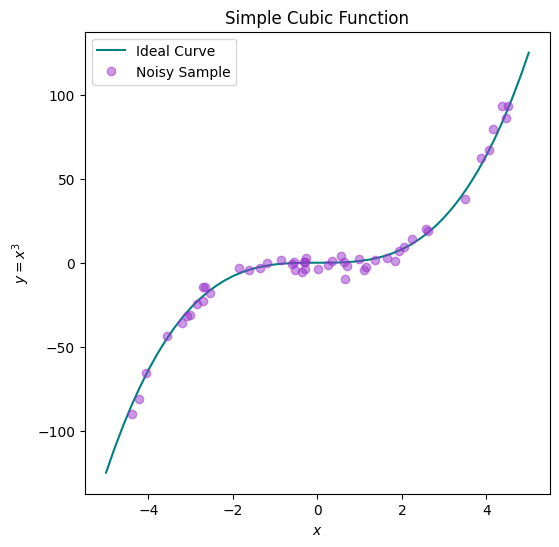

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

# generate a noiseless ideal cubic curve
xx = np.linspace(-5, 5, 51)
yy = xx * xx * xx

ax.plot(xx, yy, color="teal", marker="", linestyle="-", label="Ideal Curve")

# generate some noisy sample points
xx = shared_rng.random(50) * 10 - 5
yy = xx * xx * xx + shared_rng.normal(scale=4, size=50)

ax.plot(
    xx,
    yy,
    color="darkorchid",
    marker="o",
    linestyle="",
    label="Noisy Sample",
    alpha=0.5,
)

# you can use (some) LaTeX formatting in text labels
ax.set_xlabel("$x$")
ax.set_ylabel("$y = x^3$")

ax.set_title("Simple Cubic Function")

# add a legend
# by default this includes whatever we have provide a label for above
ax.legend();

### Histograms

We'll often want to visualise the *distribution* of data. A very common tool for this is a [histogram](https://en.wikipedia.org/wiki/Histogram), which we can plot using the [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) method.

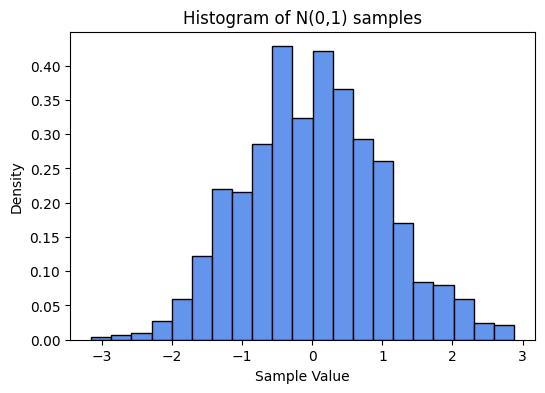

In [ ]:
fig = plt.figure(figsize=(6, 4))
ax = fig.subplots()

# generate some univariate Gaussian data
xx = shared_rng.normal(size=1000)

# plot as a density histogram (ie, area sums to 1)
ax.hist(xx, bins=21, density=True, color="cornflowerblue", edgecolor="black")

ax.set_xlabel("Sample Value")
ax.set_ylabel("Density")
ax.set_title("Histogram of N(0,1) samples");

### 3D Data

We will often have to deal with data with more than two dimensions. Visualising higher dimensional data in general can be very difficult, but for 3D we have some decent options. Two common approaches are to use colour or intensity to represent the third dimension, or to use some form of 3D projection. We will illustrate both approaches below.

For simplicity we'll consider data with two **independent variables** $x$ and $y$, and a single **dependent variable** $z$ that is a function of those variables:

$$z = f(x, y) = \cos((x-1)^2 + (y+0.5)^2)$$

We can sample many different values of $x$ and $y$ and calculate $z$ for each one. One common sampling strategy uses the NumPy functions [`linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) and [`meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) to sample all points on a grid.

In [ ]:
x = np.linspace(-2.5, 2.5, 100)
y = np.linspace(-1.5, 1.5, 100)

xx, yy = np.meshgrid(x, y)
zz = np.cos((xx - 1) * (xx - 1) + (yy + 0.5) * (yy + 0.5))

Using colour to display the value of $z$ at every point on a regular $(x,y)$ grid is exactly equivalent to displaying an **image**, which can be done in Matplotlib using the [`imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) method.

By default, `imshow` just uses the pixel dimensions of the image for the axis dimension, and it displays the image from the top downwards, which is how images are normally stored. However, in this case we want to specify the **extents** -- the value ranges across and down -- so that the match up with out $(x,y)$ values, and we also want to have the origin at the bottom, because it's standard for graphs to have $y$ increase upwards. So we add some extra options to our `imshow` call.

In addition, we're going to add some contour lines -- partly because they help make the gradients a little bit clearer, but mostly for decorative effect.

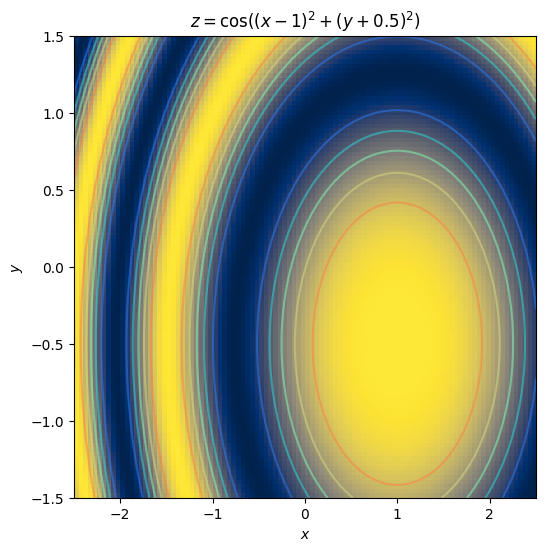

In [ ]:
# calculate the coordinate range and aspect ratio
extent = (np.min(xx), np.max(xx), np.min(yy), np.max(yy))
aspect = (extent[1] - extent[0]) / (extent[3] - extent[2])

fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

ax.imshow(zz, cmap="cividis", origin="lower", extent=extent, aspect=aspect)

# add some contour lines
levels = np.linspace(np.min(zz), np.max(zz), 7)
ax.contour(xx, yy, zz, levels, cmap="rainbow", origin="lower", extent=extent, alpha=0.5)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_title("$z = \cos((x-1)^2 + (y+0.5)^2)$");

Alternatively, we can render the data as a **surface** within a projected 3D space, using the [`plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) method.

(Note that this requires a different kind of Axes object -- [Axes3D](https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html) -- which in turn means that rather than the shorthand [`Figure.subplots`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.subplots) method used previously, we'll instead use the slightly different [`Figure.add_subplot`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.add_subplot) interface. This is the sort of fiddly detail that can make Matplotlib daunting, but don't worry about it too much. We'll mostly stick to 2D plotting in this module.)

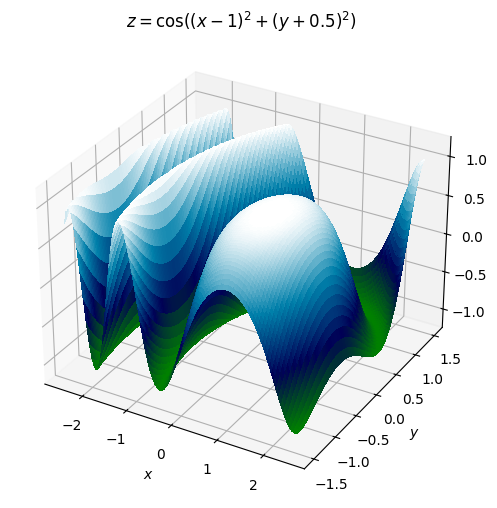

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection="3d")

ax.plot_surface(
    xx, yy, zz, rcount=100, ccount=100, cmap="ocean", antialiased=False, linewidth=0
)
ax.set_zlim(-1.2, 1.2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
ax.set_title("$z = \cos((x-1)^2 + (y+0.5)^2)$");

# Examples of plotting Machine Learning Model

Now, let us demystify the art of data plotting in the context of machine learning. **Visualization** is a powerful tool that helps us comprehend complex patterns, trends, and relationships hiding within our data. We'll emphasize that you **do not need to fear** the technical details (as they are often hidden under the hood in ML libraries).
Instead, let's focus on the intuitive and impactful world of plotting.

In your Colab notebook, we'll skip the nitty-gritty details and head straight to the exciting part – plotting! You don't need to worry about the intricate workings of the machine learning model or the underlying code; we've got that covered for you.

## Experimenting with Plots:

Feel free to play around with the code, change variables, or input different data into the Colab notebook. Witness firsthand how tweaking the inputs influences the plotted output. This hands-on experimentation is a fantastic way to grasp the immediate impact of different parameters on your visualizations.

## Your Toolbox:

We'll be leveraging powerful libraries like `matplotlib` and `seaborn`, providing a range of plotting options at your fingertips. These libraries abstract away the complexities, enabling you to focus on the visual representation of your data.

Let's Dive In!
Explore the provided code cells related to data plotting.
Modify variables, change inputs, or experiment with different types of plots.
Remember, the goal here is to instill confidence in exploring and interpreting data through visuals. You're not alone in this journey, and the beauty of data plotting is that it's as much an art as it is a science. So, let's embark on this visual adventure together and bring your data to life!

# Example 1: Generating linear continuous data

A continuous **linear model** is one whose output is just a weighted sum of the input features:

$$y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_d x_d = \sum_{i=0}^d w_i x_i$$

where we've defined a constant dummy feature $x_0 = 1$ to capture the intercept term $w_0$ in the sum. We can express this concisely in vector form:

$$y = \mathbf{w \cdot x \quad\quad w},\mathbf{x} \in \mathbb{R}^{d+1}$$

This is a *deterministic* model, fully parameterised by the weight vector $\mathbf{w}$. In practice we might expect there to be some amount of measurement error or other uncertainty in the values we obtain for $y$. One way to represent this uncertainty is with an additive error term, $\varepsilon$:

$$y = \mathbf{w \cdot x} + \varepsilon$$

This is not the only way to model the uncertainty, or necessarily the best, but it is nice and simple and very commonly used. In the absence of other information about $\varepsilon$, we will often further assume that it follows a Gaussian distribution with mean zero (since the location is already modelled by $w_0$) and standard deviation $\sigma$:

$$\varepsilon \sim N(0, \sigma^2)$$

Given $\mathbf{w}$ and $\sigma$, we can the generate any number of samples $(\mathbf{x},y)$ from this model by choosing values for $\mathbf{x}$.

## 1.1 Generate samples from a linear model with additive Gaussian noise

Have a look the body of the `generate_noisy_linear` function in the cell below.

* The function arguments `weights` and `sigma` correspond to $\mathbf{w}$ and $\sigma$ in the equations given above.
* `weights[0]` is the intercept term $w_0$. Hence, the number of features, $d$, is *one less* than the length of `weights`.
* Use the supplied generator `rng` to obtain random numbers. The Generator class is documented [here](https://numpy.org/doc/stable/reference/random/generator.html), but probably the most immediately relevant methods are [random](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html) and [normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html).

**IMPORTANT**: Here and in all subsequent examples, whenever you make changes to the code you must **run the cell again** to propagate your updates to the runtime environment.

In [ ]:
def generate_noisy_linear(num_samples, weights, sigma, limits, rng):
    """
    Draw samples from a linear model with additive Gaussian noise.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample inputs, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples output values
    """

    return utils.random_sample(
        lambda x: utils.affine(x, weights),
        len(weights) - 1,
        num_samples,
        limits,
        rng,
        sigma,
    )

## 1.2 Plot a 1D linear model

The following is an implementation of the `plot_noisy_linear_1d` function below. Note that the function generates the data to plot by calling the function in part 1.1.

In [ ]:
def plot_noisy_linear_1d(axes, num_samples, weights, sigma, limits, rng):
    """
    Generate and plot points from a noisy single-feature linear model,
    along with a line showing the true (noiseless) relationship.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert len(weights) == 2
    X, y = generate_noisy_linear(num_samples, weights, sigma, limits, rng)

    axes.plot(X, y, color="red", marker="o", linestyle="")

    y0 = weights[0] + limits[0] * weights[1]
    y1 = weights[0] + limits[1] * weights[1]
    axes.plot(limits, (y0, y1), linestyle="dashed", color="green", marker="")

    axes.set_title("Noisy 1D Linear Model")
    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[0], limits[1])
    axes.set_xlabel("$x$")
    axes.set_ylabel("$y$")

## 1.3 Plot a 2D linear model



In [ ]:
def plot_noisy_linear_2d(axes, resolution, weights, sigma, limits, rng):
    """
    Produce a plot illustrating a noisy two-feature linear model.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        resolution: how densely should the model be sampled?
        weights: vector defining the model
            (including a bias term at index 0)
        sigma: standard deviation of the additive noise
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert len(weights) == 3

    X, y = utils.grid_sample(
        lambda x: utils.affine(x, weights), 2, resolution, limits, rng, sigma
    )

    axes.imshow(
        y.T,
        cmap="GnBu",
        origin="lower",
        extent=(limits[0], limits[1], limits[0], limits[1]),
    )

    levels = np.linspace(np.min(y), np.max(y), 10)
    axes.contour(
        y.T,
        levels,
        colors="white",
        origin="lower",
        extent=(limits[0], limits[1], limits[0], limits[1]),
    )

    axes.set_xlabel("$x_1$")
    axes.set_ylabel("$x_2$")

    axes.set_title("Noisy 2D Linear Model")

## → Run Example 1

Execute the code cell below to run the previous examples and generate a pair of plots.

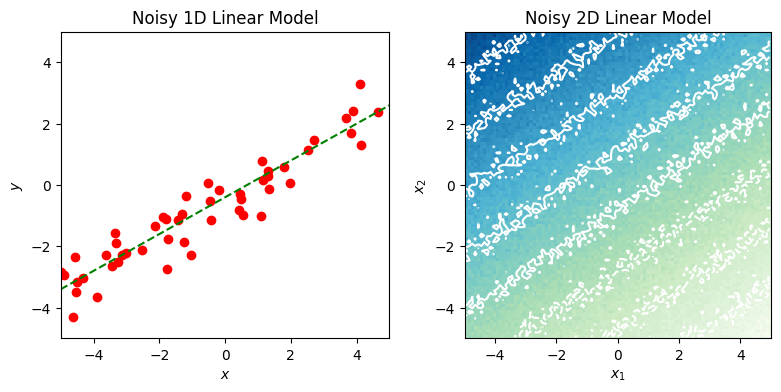

In [ ]:
fig = plt.figure(figsize=(8, 4))
axs = fig.subplots(ncols=2)

plot_noisy_linear_1d(axs[0], 50, WEIGHTS[1:], 0.5, LIMITS, shared_rng)
plot_noisy_linear_2d(axs[1], 100, WEIGHTS, 0.2, LIMITS, shared_rng)
fig.tight_layout(pad=1)

# Example 2: Generating linearly separable binary data

We can use an equation akin to the model in Example 1 to define a linear boundary -- or **separating
hyperplane** -- that divides a feature space into disjoint half-spaces:

$$\mathbf{w \cdot x} = 0$$

In a **binary classification** problem, if there exists at least one such hyperplane for which all samples of class 0 are on one side and all those of class 1 are on the other, then the data are said to be **linearly separable**, and we can define a classifier using the hyperplane as a decision boundary:

\begin{equation*}
y = \begin{cases}
	1 & \text{if $\mathbf{w \cdot x} \ge 0$}\\
	0 & \text{otherwise}
     \end{cases}
\end{equation*}

Putting aside the question of how to *find* such a plane, or whether it makes a *good* classifier, we can see that (as with the continuous case in example 1) it is easy to generate samples $(\mathbf{x}, y)$ given $\mathbf{w}$.



## 2.1 Generate sample data with binary labels that are linearly separable in a continuous feature space

Have a look at the `generate_linearly_separable` function below.

(The notes from Example 1.1 also apply here.)

In [ ]:
def generate_linearly_separable(num_samples, weights, limits, rng):
    """
    Draw samples from a binary model with a given linear
    decision boundary.

    # Arguments
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        X: a matrix of sample vectors, where
            the samples are the rows and the
            features are the columns
            ie, its size should be:
              num_samples x (len(weights) - 1)
        y: a vector of num_samples binary labels
    """

    def hyperplane_label(X, boundary):
        y = utils.affine(X, boundary)
        return (y > 0).astype(np.float64)

    return utils.random_sample(
        lambda x: hyperplane_label(x, weights),
        count=len(weights) - 1,
        num_samples=num_samples,
        limits=limits,
        rng=rng,
    )

## 2.2 Plot a set of labelled 2D samples and their boundary line

The following is an implementation of the function `plot_linearly_separable_2d` below. As in 1.2, the call to generate the data using the function above is provided, all you need to do is plot it.

Aim to include most or all of the following features in your plot:

* All the generated samples, with their class clearly indicated (eg, by colour and shape).
* A line marking the decision boundary. You will need to calculate the end points (or other defining parameters such as gradient and intercept) from the weights vector. Consider how to do this -- are there any edge cases you need to take into account.
* An [arrow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html) to show the weight vector itself.

Verify that the weight vector is normal to the boundary and points towards the positive class.

In [ ]:
def plot_linearly_separable_2d(axes, num_samples, weights, limits, rng):
    """
    Plot a linearly separable binary data set in a 2d feature space.

    # Arguments
        axes: a Matplotlib Axes object into which to plot
        num_samples: number of samples to generate
            (ie, the number of rows in the returned X
            and the length of the returned y)
        weights: vector defining the decision boundary
            (including a bias term at index 0)
        limits: a tuple (low, high) specifying the value
            range of all the input features x_i
        rng: an instance of numpy.random.Generator
            from which to draw random numbers

    # Returns
        None
    """
    assert len(weights) == 3
    X, y = generate_linearly_separable(num_samples, weights, limits, rng)

    # plot the two subsets with different markers & colours
    axes.plot(
        X[y < 0.5, 0],
        X[y < 0.5, 1],
        color="red",
        marker="o",
        linestyle="",
        label="Class 0",
    )
    axes.plot(
        X[y >= 0.5, 0],
        X[y >= 0.5, 1],
        color="blue",
        marker="v",
        linestyle="",
        label="Class 1",
    )

    # to draw the boundary line we need to calculate the endpoints
    # NB: this will fail if either of the coordinate weights is 0.
    # special case it later
    y0 = -(weights[0] + limits[0] * weights[1]) / weights[2]
    y1 = -(weights[0] + limits[1] * weights[1]) / weights[2]

    axes.plot(limits, (y0, y1), linestyle="dashed", color="green", marker="")

    mid_x = np.sum(limits) / 2
    mid_y = (y0 + y1) / 2

    axes.arrow(
        mid_x,
        mid_y,
        weights[1],
        weights[2],
        color="darkorchid",
        width=0.06,
        head_width=0.3,
        overhang=0.3,
    )

    axes.legend(loc="upper left")

    axes.set_title("Linearly Separable Binary Data")
    axes.set_xlim(limits[0], limits[1])
    axes.set_ylim(limits[0], limits[1])
    axes.set_xlabel("$x_1$")
    axes.set_ylabel("$x_2$")

## → Run Example 2

Execute the code cell below to run the function you wrote above and generate a plot.

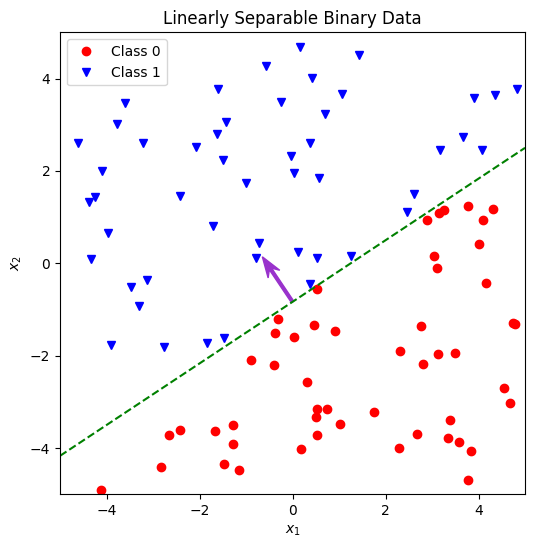

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.subplots()

plot_linearly_separable_2d(
    ax, num_samples=100, weights=WEIGHTS, limits=LIMITS, rng=shared_rng
)